# Task 2.1

__SUMMARY__
- Step 1: Import required libraries
- Step 2: Read all requred datasets into dataframes
  - [total_population, urban_population] from worldbank datasets 
  - [Metadata] dataset for the above for data cleansing operation
  - [Natural earth] dataset for geometry details of country codes
- Step 3: Data Cleansing
  - Remove grouped country codes from [total_population, urban_population] like OECD, Arab Nations, etc
  - Deal with "-99" ISO_A3 codes in [Natural earth] dataset
- Step 4: Data Preparation
  - Make country codes as index of all datasets
  - calculate per_capita_urban_population using pandas division
  - join the above created dataset to natural earth dataset to add geometry values
- Step 5: Save the processed datasets for futher use
  - save the processed datasets so they can be used for Task 2.2
- Step 6: Choropleth Plots
  - Plot choropleth maps for the years 1990, 2000 & 2010

# STEP 1: IMPORT REQUIRED LIBRARIES
1. Pandas library to read/ edit tabular data from csv files, perform group operations if required, etc
2. Geopandas library to create geopandas dataframes, plot choropleth maps
3. matplotlib library to edit/ manipulate the plots

In [78]:
from IPython.display import display
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import numpy as np
import seaborn as sns

# STEP 2: READ ALL REQURED DATASETS INTO DATAFRAMES

## 2.1 Read total population dataset
Use skiprows to skip over the first 4 rows after which the table starts in the csv file

In [79]:
total_pop = pd.read_csv(r'Input datasets/API_SP.POP.TOTL_DS2_en_csv_v2_1637443.csv', skiprows=4)
total_pop

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0,NaN,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,...,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0,NaN,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,...,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0,NaN,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,NaN,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1794248.0,NaN,NaN
260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5315355.0,5393036.0,5473671.0,5556766.0,5641597.0,5727751.0,...,24473178.0,25147109.0,25823485.0,26497889.0,27168210.0,27834821.0,28498687.0,29161922.0,NaN,NaN
261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17099840.0,17524533.0,17965725.0,18423161.0,18896307.0,19384841.0,...,52834005.0,53689236.0,54545991.0,55386367.0,56203654.0,57000451.0,57779622.0,58558270.0,NaN,NaN
262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3070776.0,3164329.0,3260650.0,3360104.0,3463213.0,3570464.0,...,14465121.0,14926504.0,15399753.0,15879361.0,16363507.0,16853688.0,17351822.0,17861030.0,NaN,NaN


## 2.2 Read urban population dataset
Use skiprows to skip over the first 4 rows after which the table starts in the csv file

In [80]:
urban_pop = pd.read_csv(r'Input datasets/API_SP.URB.TOTL_DS2_en_csv_v2_1868968.csv', skiprows=4)
urban_pop

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,Urban population,SP.URB.TOTL,27526.0,28141.0,28532.0,28761.0,28924.0,29082.0,...,44057.0,44348.0,44665.0,44979.0,45296.0,45616.0,45948.0,46295.0,NaN,NaN
1,Afghanistan,AFG,Urban population,SP.URB.TOTL,755836.0,796272.0,839385.0,885228.0,934135.0,986074.0,...,7528588.0,7865067.0,8204877.0,8535606.0,8852859.0,9164841.0,9477100.0,9797273.0,NaN,NaN
2,Angola,AGO,Urban population,SP.URB.TOTL,569222.0,597288.0,628381.0,660180.0,691532.0,721552.0,...,15383127.0,16130304.0,16900847.0,17691524.0,18502165.0,19332881.0,20184707.0,21061025.0,NaN,NaN
3,Albania,ALB,Urban population,SP.URB.TOTL,493982.0,513592.0,530766.0,547928.0,565248.0,582374.0,...,1575788.0,1603505.0,1630119.0,1654503.0,1680247.0,1706345.0,1728969.0,1747593.0,NaN,NaN
4,Andorra,AND,Urban population,SP.URB.TOTL,7839.0,8766.0,9754.0,10811.0,11915.0,13067.0,...,73056.0,71515.0,70057.0,68919.0,68213.0,67876.0,67813.0,67873.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,Urban population,SP.URB.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,"Yemen, Rep.",YEM,Urban population,SP.URB.TOTL,483697.0,510127.0,538117.0,567679.0,598799.0,631542.0,...,8065870.0,8439118.0,8822594.0,9215171.0,9615916.0,10024989.0,10442489.0,10869523.0,NaN,NaN
261,South Africa,ZAF,Urban population,SP.URB.TOTL,7971774.0,8200255.0,8427003.0,8662570.0,8906585.0,9158950.0,...,33429132.0,34249974.0,35079618.0,35905874.0,36724030.0,37534797.0,38339668.0,39149717.0,NaN,NaN
262,Zambia,ZMB,Urban population,SP.URB.TOTL,557192.0,599672.0,645120.0,695945.0,762426.0,834489.0,...,5837255.0,6099716.0,6372726.0,6654564.0,6944345.0,7243041.0,7551686.0,7871713.0,NaN,NaN


## 2.3 Read world bank report metadata
- This dataset is required for data cleansing operation
- The total and urban population datasets include grouped data (such as OECD countries, Arab countries and even a record for entire world)
- The metadata information can be used to get the list of these grouped countries

In [81]:
country_code_info = pd.read_csv(r'Input datasets/Metadata_Country_API_SP.POP.TOTL_DS2_en_csv_v2_2252106.csv')
country_code_info.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFG,South Asia,Low income,NaN,Afghanistan,NaN
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,NaN
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania,NaN
4,AND,Europe & Central Asia,High income,NaN,Andorra,NaN


## 2.4 Read downloaded large scale geometry data from Natural earth website
- The large scale dataset is used because it has countries
- naturalearth lowres data is readily available in geopandas using _gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))_. But this was not used because only 177 countries are present in this (compared to over 210 countries in total and urban population datasets)


___Link to dataset source:___ https://www.naturalearthdata.com/downloads/10m-cultural-vectors/

<AxesSubplot:>

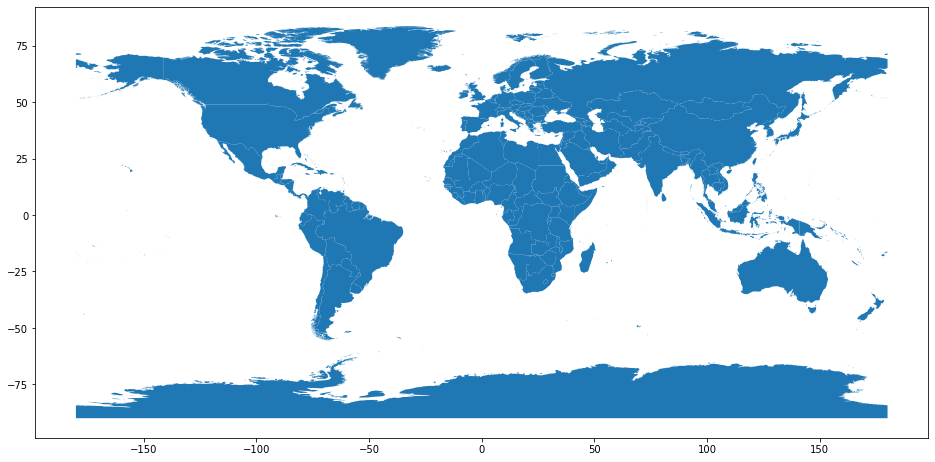

In [82]:
country_shapes = gpd.read_file(r"Input datasets/ne_10m_admin_0_countries\ne_10m_admin_0_countries.shp")
country_shapes.plot(figsize=(16, 12))
# print(len(total_pop['Country Code'].unique()))
# print(len(country_shapes.ISO_A3.unique()))


# STEP 3: DATA CLEANSING

## 3.1 Data Cleansing for total and urban pop
Remove records from total pop and urban pop which are entries for grouped countries like OECD.

This is done in two steps,
1. We get the list of country code for grouped countries from the world bank metadata dataset (These grouped countries have no data in Region column in metadata dataset)
2. We use this list to filter out these country codes from total and urban pop

In [83]:
#display(country_code_info[country_code_info['Region'].isna()])

temp_list = []
temp_list = country_code_info[country_code_info['Region'].isna()]['Country Code'].tolist()
print(temp_list,)

['ARB', 'CEB', 'CSS', 'EAP', 'EAR', 'EAS', 'ECA', 'ECS', 'EMU', 'EUU', 'FCS', 'HIC', 'HPC', 'IBD', 'IBT', 'IDA', 'IDB', 'IDX', 'LAC', 'LCN', 'LDC', 'LIC', 'LMC', 'LMY', 'LTE', 'MEA', 'MIC', 'MNA', 'NAC', 'OED', 'OSS', 'PRE', 'PSS', 'PST', 'SAS', 'SSA', 'SSF', 'SST', 'TEA', 'TEC', 'TLA', 'TMN', 'TSA', 'TSS', 'UMC', 'WLD']


In [84]:
# total_poptotal_pop.drop(temp_list, axis=0, inplace=True)
# urban_pop.drop(temp_list, axis=0, inplace=True)

total_pop = total_pop[~total_pop['Country Code'].isin(temp_list)]
urban_pop = urban_pop[~urban_pop['Country Code'].isin(temp_list)]

print('\t\t\t\t\t\t\t\t\t\t\t\t total_pop\n\t\t\t\t\t\t\t\t\t\t\t\t =========\n')
display(total_pop)
print('\t\t\t\t\t\t\t\t\t\t\t\t urban_pop\n\t\t\t\t\t\t\t\t\t\t\t\t =========\n')
display(urban_pop)

												 total_pop



,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0,NaN,NaN
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,...,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0,NaN,NaN
2,Angola,AGO,"Population, total",SP.POP.TOTL,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,...,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0,NaN,NaN
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,NaN,NaN
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1807106.0,1818117.0,1812771.0,1788196.0,1777557.0,1791003.0,1797085.0,1794248.0,NaN,NaN
260,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5315355.0,5393036.0,5473671.0,5556766.0,5641597.0,5727751.0,...,24473178.0,25147109.0,25823485.0,26497889.0,27168210.0,27834821.0,28498687.0,29161922.0,NaN,NaN
261,South Africa,ZAF,"Population, total",SP.POP.TOTL,17099840.0,17524533.0,17965725.0,18423161.0,18896307.0,19384841.0,...,52834005.0,53689236.0,54545991.0,55386367.0,56203654.0,57000451.0,57779622.0,58558270.0,NaN,NaN
262,Zambia,ZMB,"Population, total",SP.POP.TOTL,3070776.0,3164329.0,3260650.0,3360104.0,3463213.0,3570464.0,...,14465121.0,14926504.0,15399753.0,15879361.0,16363507.0,16853688.0,17351822.0,17861030.0,NaN,NaN


												 urban_pop



,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,Urban population,SP.URB.TOTL,27526.0,28141.0,28532.0,28761.0,28924.0,29082.0,...,44057.0,44348.0,44665.0,44979.0,45296.0,45616.0,45948.0,46295.0,NaN,NaN
1,Afghanistan,AFG,Urban population,SP.URB.TOTL,755836.0,796272.0,839385.0,885228.0,934135.0,986074.0,...,7528588.0,7865067.0,8204877.0,8535606.0,8852859.0,9164841.0,9477100.0,9797273.0,NaN,NaN
2,Angola,AGO,Urban population,SP.URB.TOTL,569222.0,597288.0,628381.0,660180.0,691532.0,721552.0,...,15383127.0,16130304.0,16900847.0,17691524.0,18502165.0,19332881.0,20184707.0,21061025.0,NaN,NaN
3,Albania,ALB,Urban population,SP.URB.TOTL,493982.0,513592.0,530766.0,547928.0,565248.0,582374.0,...,1575788.0,1603505.0,1630119.0,1654503.0,1680247.0,1706345.0,1728969.0,1747593.0,NaN,NaN
4,Andorra,AND,Urban population,SP.URB.TOTL,7839.0,8766.0,9754.0,10811.0,11915.0,13067.0,...,73056.0,71515.0,70057.0,68919.0,68213.0,67876.0,67813.0,67873.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,Urban population,SP.URB.TOTL,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,"Yemen, Rep.",YEM,Urban population,SP.URB.TOTL,483697.0,510127.0,538117.0,567679.0,598799.0,631542.0,...,8065870.0,8439118.0,8822594.0,9215171.0,9615916.0,10024989.0,10442489.0,10869523.0,NaN,NaN
261,South Africa,ZAF,Urban population,SP.URB.TOTL,7971774.0,8200255.0,8427003.0,8662570.0,8906585.0,9158950.0,...,33429132.0,34249974.0,35079618.0,35905874.0,36724030.0,37534797.0,38339668.0,39149717.0,NaN,NaN
262,Zambia,ZMB,Urban population,SP.URB.TOTL,557192.0,599672.0,645120.0,695945.0,762426.0,834489.0,...,5837255.0,6099716.0,6372726.0,6654564.0,6944345.0,7243041.0,7551686.0,7871713.0,NaN,NaN


## 3.2 Data Cleansing for the geometry dataset - country_shapes
There are five country codes available in total and urban pop but missing in country_shapes and are handled as below,

- FRA - The record for France has -99 as ISO_A3 code. We will manually update this to FRA in country_shapes
- NOR - The record for Norway has -99 as ISO_A3 code. We will manually update this to NOR in country_shapes
- XKX - The record for Kosovo has -99 as ISO_A3 code. We will manually update this to XKX in country_shapes
- INX - This is the code for 'unidentified' in the total and urban pop and hence will be ignored (it is not available in country shapes)
- CHI - This country code in total and urban pop represents channel islands. This is missing in country_shapes as channel islands has been added to the United Kingdom. No correction will be made for this. So this will be a known anamoly for our study.

In [85]:
#set(total_pop['Country Code'].unique()) - set(country_shapes.ISO_A3.unique()) #---shows the five country codes missing in country_shapes but present in total and urban pop

In [86]:
country_shapes.loc[country_shapes['NAME'] == 'Norway', 'ISO_A3'] = 'NOR'
country_shapes.loc[country_shapes['NAME'] == 'France', 'ISO_A3'] = 'FRA'
country_shapes.loc[country_shapes['NAME'] == 'Kosovo', 'ISO_A3'] = 'XKX'

There are 16 other records with -99 ISO_A3.

These are not of much importance since total and urban pop do not contain thesse values.

However, to cleanse this, we will copy ADM0_A3 values of these countries (which are not null) to the ISO_A3 values

In [87]:
# country_shapes[['NAME','ISO_A3', 'ADM0_A3']].query('ISO_A3=="-99"') #---shows the pending 16 records with ISO_A3 = -99

In [88]:
country_shapes.loc[country_shapes['ISO_A3'] == '-99', 'ISO_A3'] = country_shapes['ADM0_A3']

In [89]:
country_shapes.loc[country_shapes['ISO_A3'] == '-99', 'ISO_A3']

Series([], Name: ISO_A3, dtype: object)

In [90]:
country_shapes = country_shapes[['NAME','ISO_A3','geometry']]

# STEP 4: DATA PREPARATION

## 4.1 Make country codes as the index in all datasets
Making country codes as the index in each dataframe will make it easy to perform operations using index. For example to find per capita population we can divide the two dataframes using the index values.

In [91]:
total_pop.set_index('Country Code', inplace=True)
urban_pop.set_index('Country Code', inplace=True)
country_shapes.set_index('ISO_A3', inplace=True)


print('\t\t\t\t\t\t\t\t\t\t\t\t total_pop\n\t\t\t\t\t\t\t\t\t\t\t\t =========\n')
display(total_pop.head())
print('\t\t\t\t\t\t\t\t\t\t\t\t urban_pop\n\t\t\t\t\t\t\t\t\t\t\t\t =========\n')
display(urban_pop.head())
print('\t\t\t\t\t\t\t\t\t\t\t\t country_shapes\n\t\t\t\t\t\t\t\t\t\t\t\t ==============\n')
display(country_shapes.head())

												 total_pop



,Country Name,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
Country Code,,,,,,,,,,,,,,,,,,,,,
ABW,Aruba,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,...,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,106314.0,NaN,NaN
AFG,Afghanistan,"Population, total",SP.POP.TOTL,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,...,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,38041754.0,NaN,NaN
AGO,Angola,"Population, total",SP.POP.TOTL,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,5781214.0,...,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,31825295.0,NaN,NaN
ALB,Albania,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,...,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,2854191.0,NaN,NaN
AND,Andorra,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,...,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,77142.0,NaN,NaN


												 urban_pop



,Country Name,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
Country Code,,,,,,,,,,,,,,,,,,,,,
ABW,Aruba,Urban population,SP.URB.TOTL,27526.0,28141.0,28532.0,28761.0,28924.0,29082.0,29253.0,...,44057.0,44348.0,44665.0,44979.0,45296.0,45616.0,45948.0,46295.0,NaN,NaN
AFG,Afghanistan,Urban population,SP.URB.TOTL,755836.0,796272.0,839385.0,885228.0,934135.0,986074.0,1041191.0,...,7528588.0,7865067.0,8204877.0,8535606.0,8852859.0,9164841.0,9477100.0,9797273.0,NaN,NaN
AGO,Angola,Urban population,SP.URB.TOTL,569222.0,597288.0,628381.0,660180.0,691532.0,721552.0,749534.0,...,15383127.0,16130304.0,16900847.0,17691524.0,18502165.0,19332881.0,20184707.0,21061025.0,NaN,NaN
ALB,Albania,Urban population,SP.URB.TOTL,493982.0,513592.0,530766.0,547928.0,565248.0,582374.0,599300.0,...,1575788.0,1603505.0,1630119.0,1654503.0,1680247.0,1706345.0,1728969.0,1747593.0,NaN,NaN
AND,Andorra,Urban population,SP.URB.TOTL,7839.0,8766.0,9754.0,10811.0,11915.0,13067.0,14262.0,...,73056.0,71515.0,70057.0,68919.0,68213.0,67876.0,67813.0,67873.0,NaN,NaN


												 country_shapes



,NAME,geometry
ISO_A3,,
IDN,Indonesia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
MYS,Malaysia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
CHL,Chile,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
BOL,Bolivia,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
PER,Peru,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


## 4.2 Prepare per capita urban pop dataset
compute per capital urban population for the years 1990, 2000, 2010

Since the index of all datasets are the Country COdes, pandas division can be used to calculate per capita urban population from total_pop and urban_pop

In [92]:
per_capita_pop = urban_pop.loc[:,'1990':'2010'].div(total_pop.loc[:,'1990':'2010'])
per_capita_pop

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
Country Code,,,,,,,,,,,,,,,,,,,,,
ABW,0.503194,0.503033,0.499978,0.495876,0.491773,0.487675,0.483558,0.479456,0.475360,0.471266,...,0.463390,0.459723,0.456064,0.452404,0.448751,0.445108,0.441465,0.437834,0.434212,0.430593
AFG,0.211770,0.212660,0.213550,0.214440,0.215340,0.216240,0.217140,0.218050,0.218950,0.219860,...,0.221690,0.222610,0.223530,0.225000,0.227030,0.229070,0.231130,0.233200,0.235280,0.237370
AGO,0.371440,0.385800,0.400390,0.415110,0.430000,0.441690,0.453460,0.465250,0.477100,0.488970,...,0.512740,0.524610,0.536450,0.548270,0.560000,0.567640,0.575240,0.582820,0.590340,0.597830
ALB,0.364280,0.367000,0.372490,0.377990,0.383540,0.389110,0.394730,0.400350,0.406010,0.411690,...,0.424350,0.435010,0.445730,0.456510,0.467310,0.478150,0.489020,0.499910,0.510760,0.521630
AND,0.947128,0.945298,0.943248,0.941103,0.938893,0.936617,0.934245,0.931802,0.929266,0.926658,...,0.920554,0.916416,0.912069,0.907507,0.902849,0.898065,0.893075,0.890046,0.889123,0.888193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YEM,0.209310,0.214890,0.220580,0.226360,0.232250,0.237600,0.242490,0.247430,0.252440,0.257520,...,0.267870,0.273150,0.278490,0.283900,0.289360,0.294900,0.300510,0.306190,0.311940,0.317760
ZAF,0.520370,0.525540,0.530380,0.535210,0.540040,0.544860,0.549670,0.554490,0.559300,0.564110,...,0.573680,0.578980,0.584460,0.589930,0.595360,0.600770,0.606160,0.611540,0.616870,0.622180


## 4.3 Check fr bad values

__There are no infinite values as seen below__

Infinite values could occur when division takees place by a zero

In [93]:
per_capita_pop[(per_capita_pop == np.inf).any(axis=1)]

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
Country Code,,,,,,,,,,,,,,,,,,,,,


__There are some Null values as seen below__

We do not have to update them because geopandas will simply ignore them when plotting the map. 

Converting them to zero might give a wrong output as 0 might actually represent countries where urban population is very low. Since we do not know the data for these countries, we should not be assuming it.

In [94]:
per_capita_pop.loc[per_capita_pop.isna().any(axis=1)]

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
Country Code,,,,,,,,,,,,,,,,,,,,,
INX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KWT,0.97974,0.97988,NaN,NaN,NaN,0.98096,0.98325,0.98527,0.98705,0.98862,...,0.99908,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
MAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SXM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00000,1.00000,...,1.00000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 4.4 calculate representativepoints for each geometry which helps with labelling plots

In [110]:
pd.options.mode.chained_assignment = None  # default='warn'

country_shapes['rep_coords'] = country_shapes['geometry'].representative_point()
country_shapes

,NAME,geometry,rep_coords
ISO_A3,,,
IDN,Indonesia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",POINT (113.32523 0.10491)
MYS,Malaysia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...",POINT (102.11153 3.98945)
CHL,Chile,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...",POINT (-71.49640 -35.71034)
BOL,Bolivia,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...",POINT (-64.28580 -16.28784)
PER,Peru,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...",POINT (-75.76765 -9.18342)
...,...,...,...
MAC,Macao,"MULTIPOLYGON (((113.55860 22.16303, 113.56943 ...",POINT (113.55943 22.13618)
ATC,Ashmore and Cartier Is.,"POLYGON ((123.59702 -12.42832, 123.59775 -12.4...",POINT (123.58635 -12.43255)
BJN,Bajo Nuevo Bank,"POLYGON ((-79.98929 15.79495, -79.98782 15.796...",POINT (-79.98794 15.79558)


## 4.5: Join per_capita_pop to country_shapes to get the geometry data for each country code

In [96]:
geo_combined_pop = country_shapes.merge(per_capita_pop, left_index=True, right_index=True)
geo_combined_pop

,NAME,geometry,rep_coords,1990,1991,1992,1993,1994,1995,1996,...,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010
IDN,Indonesia,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4...",POINT (113.32523 0.10491),0.305840,0.316130,0.327030,0.338080,0.349330,0.360760,0.372350,...,0.427830,0.435680,0.443560,0.451490,0.459420,0.467380,0.475350,0.483350,0.491340,0.499140
MYS,Malaysia,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4...",POINT (102.11153 3.98945),0.497940,0.505760,0.518140,0.531090,0.544020,0.556880,0.569690,...,0.629220,0.638560,0.647800,0.656940,0.665940,0.674830,0.683600,0.692250,0.700750,0.709120
CHL,Chile,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611...",POINT (-71.49640 -35.71034),0.832710,0.833980,0.835640,0.838960,0.842230,0.845450,0.848610,...,0.863630,0.866060,0.866650,0.867250,0.867830,0.868420,0.869000,0.869590,0.870170,0.870740
BOL,Bolivia,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5...",POINT (-64.28580 -16.28784),0.555770,0.565790,0.575410,0.580790,0.586150,0.591500,0.596820,...,0.623060,0.627830,0.632480,0.637110,0.641700,0.646280,0.650820,0.655350,0.659840,0.664300
PER,Peru,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832...",POINT (-75.76765 -9.18342),0.689010,0.693000,0.696970,0.700890,0.705210,0.709510,0.713770,...,0.734480,0.738500,0.742490,0.746440,0.750340,0.754210,0.758030,0.760520,0.762410,0.764300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PLW,Palau,"MULTIPOLYGON (((134.27149 7.07453, 134.27931 7...",POINT (134.58089 7.54428),0.695909,0.699631,0.703393,0.707060,0.710714,0.714286,0.713068,...,0.700918,0.698477,0.695997,0.703830,0.711541,0.719089,0.726537,0.733907,0.741099,0.748148
GUM,Guam,"POLYGON ((144.88640 13.64020, 144.89666 13.617...",POINT (144.76055 13.45962),0.907957,0.910608,0.913199,0.915712,0.918159,0.920549,0.922869,...,0.932328,0.933342,0.934351,0.935339,0.936308,0.937270,0.938217,0.939158,0.940079,0.940989
MNP,N. Mariana Is.,"MULTIPOLYGON (((145.20574 14.18138, 145.25245 ...",POINT (145.21334 14.15843),0.897316,0.896970,0.896613,0.896280,0.895931,0.895574,0.896551,...,0.902351,0.903167,0.903981,0.904779,0.905575,0.906374,0.907152,0.907954,0.908715,0.909488
BHR,Bahrain,"POLYGON ((50.55161 26.19424, 50.59474 26.16031...",POINT (50.54479 26.00208),0.881401,0.883290,0.883981,0.883950,0.883919,0.883881,0.883850,...,0.883691,0.883731,0.883829,0.883990,0.884220,0.884520,0.884880,0.885300,0.885790,0.886340


## 4.6 Mean per capita urban population between 1990 and 2010
Unlike plotting, calculating mean calls for ignoring Nan values.

This is beacuse the mean value might fall because of the Nan values. So we use the skipna=True parameter when calculating means)

In [97]:
mean_per_capita_urban_pop_1990_2010 = geo_combined_pop.loc[:,'1990':'2010'].mean(skipna=True).to_frame(name='mean_per_capita_urban_pop')
mean_per_capita_urban_pop_1990_2010

,mean_per_capita_urban_pop
1990,0.526584
1991,0.530099
1992,0.530883
1993,0.533658
1994,0.536311
1995,0.540918
1996,0.543449
1997,0.546106
1998,0.550824
1999,0.553394


## 4.7 Mean total population between 1990 and 2010

In [98]:
mean_total_pop_1990_2010 = total_pop.loc[:,'1990':'2010'].mean(skipna=True).to_frame(name='mean_total_pop')
mean_total_pop_1990_2010

,mean_total_pop
1990,2.435092e+07
1991,2.475723e+07
1992,2.526356e+07
1993,2.565878e+07
1994,2.604981e+07
1995,2.632144e+07
1996,2.670463e+07
1997,2.708636e+07
1998,2.733720e+07
1999,2.770730e+07


## 4.8 Combined means dataset
Create a single dataframe with both mean per capita urban population and mean total population for the entire world from 1990 to 2010

In [99]:
_1990_2010_combined_means = pd.merge(mean_per_capita_urban_pop_1990_2010, mean_total_pop_1990_2010, left_index=True, right_index=True)
_1990_2010_combined_means

,mean_per_capita_urban_pop,mean_total_pop
1990,0.526584,2.435092e+07
1991,0.530099,2.475723e+07
1992,0.530883,2.526356e+07
1993,0.533658,2.565878e+07
1994,0.536311,2.604981e+07
1995,0.540918,2.632144e+07
1996,0.543449,2.670463e+07
1997,0.546106,2.708636e+07
1998,0.550824,2.733720e+07
1999,0.553394,2.770730e+07


# STEP 5: CHOROPLETH PLOTS

## 5.1 Urban Population per Capita for 1990

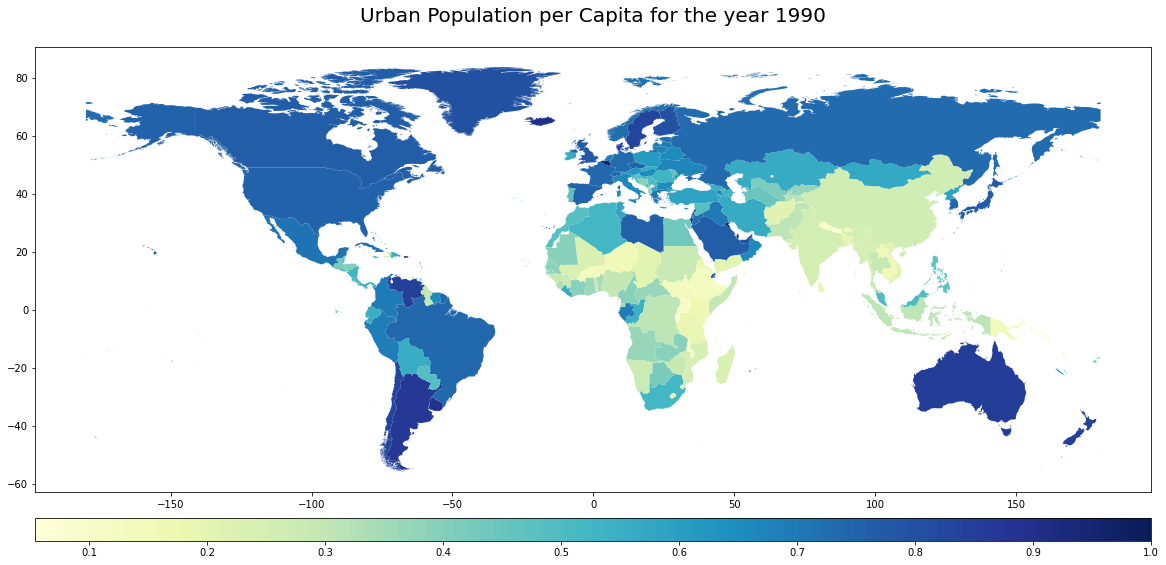

In [100]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1, figsize=(20, 16));

ax.set_title("Urban Population per Capita for the year 1990", fontsize=20, pad=25);

geo_combined_pop.plot(column='1990', 
                      cmap='YlGnBu',
                      ax=ax, 
                      legend=True,
                      legend_kwds={'orientation': "horizontal", 
                                   'pad': 0.03, 
                                   'aspect': 50, 
                                   'ticks': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
                                  }
                     );

## 5.2 Urban Population per Capita for 2000

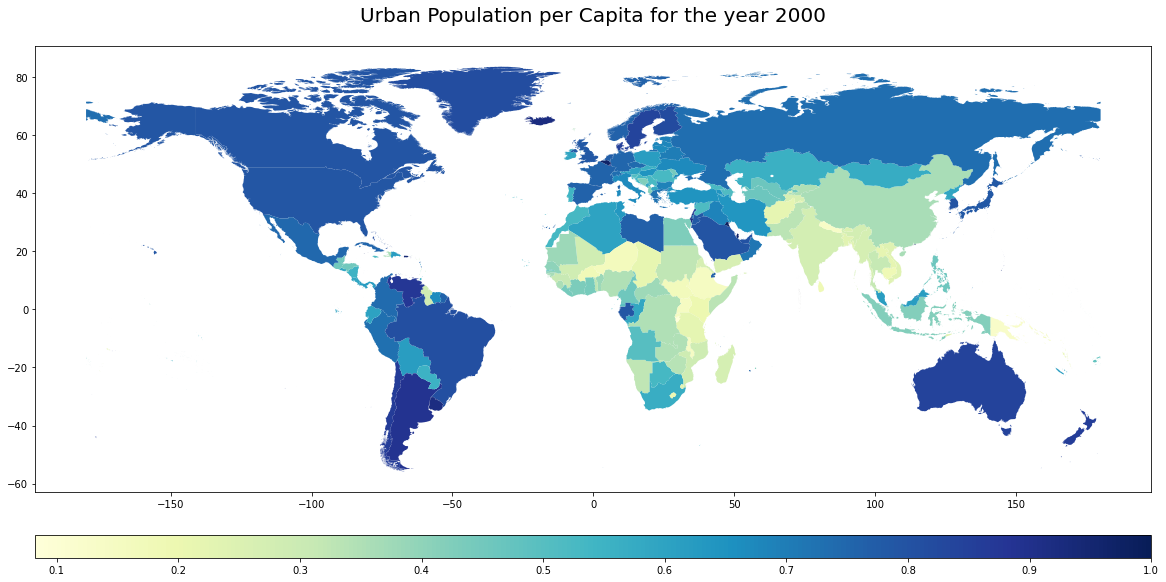

In [101]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1, figsize=(20, 16));

ax.set_title("Urban Population per Capita for the year 2000", fontsize=20, pad=25);

geo_combined_pop.plot(column='2000', 
                      cmap='YlGnBu',
                      ax=ax, 
                      legend=True,
                      legend_kwds={'orientation': "horizontal", 
                                   'pad': 0.05, 
                                   'aspect': 50, 
                                   'ticks': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
                                  }
                     );

plt.show()

## 5.3 Urban Population per Capita for 2010

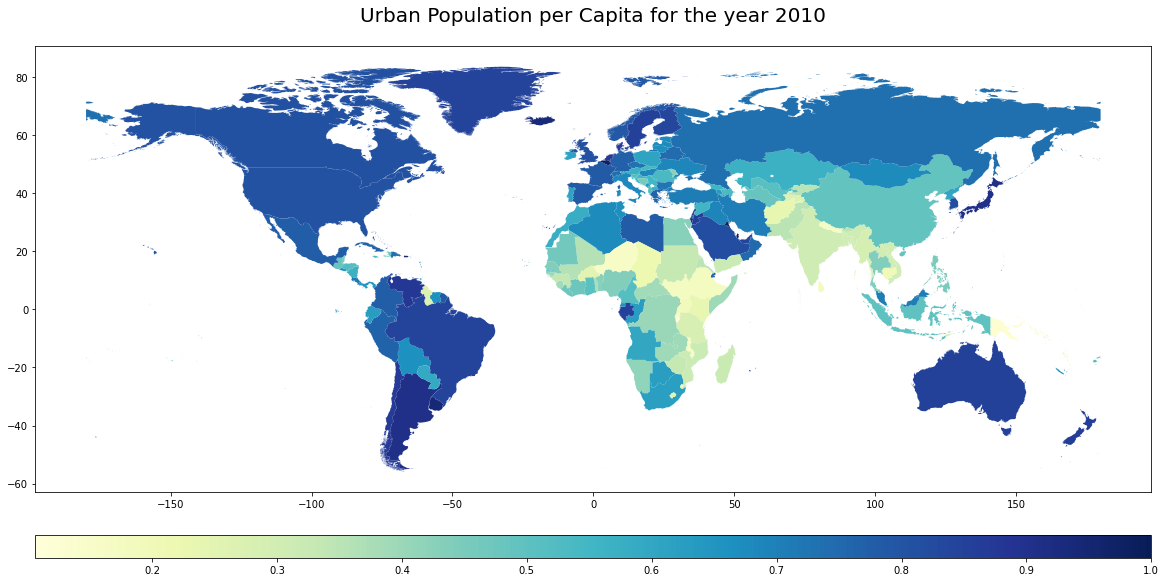

In [102]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1, figsize=(20, 16));

ax.set_title("Urban Population per Capita for the year 2010", fontsize=20, pad=25);


geo_combined_pop.plot(column='2010', 
                      cmap='YlGnBu',
                      ax=ax, 
                      legend=True,
                      legend_kwds={'orientation': "horizontal", 
                                   'pad': 0.05, 
                                   'aspect': 50, 
                                   'ticks': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
                                  }
                     );

## 5.4 2010 Urban Population per Capita for countries with total population greater than 290 million

In [103]:
grt_290_mil = total_pop.index[total_pop['2010'] > 290000000].tolist()

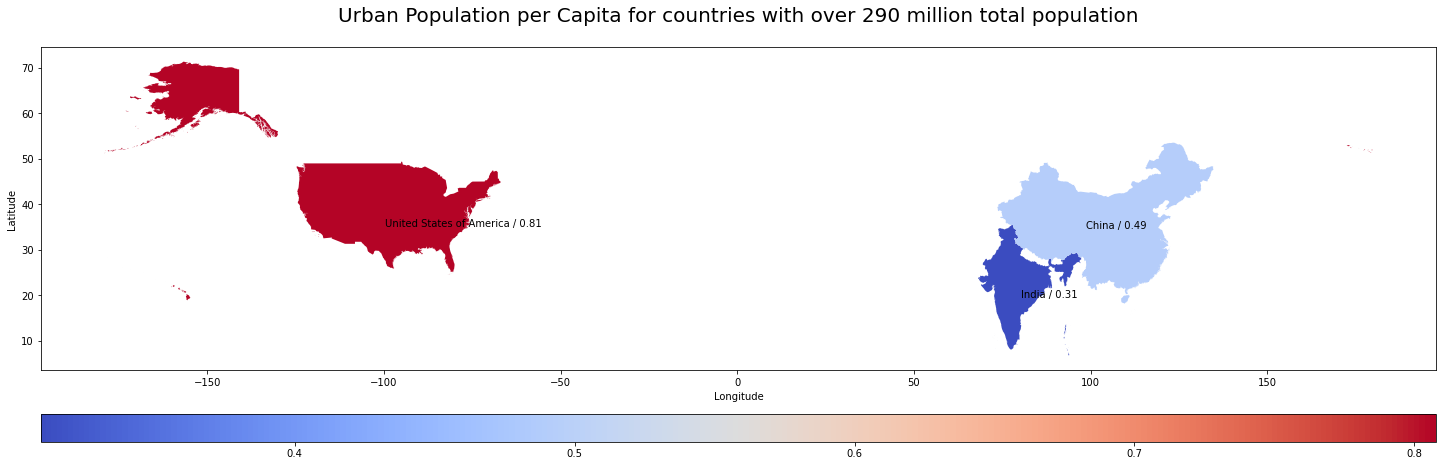

In [104]:
grt_290_mil_df = geo_combined_pop[geo_combined_pop.index.isin(grt_290_mil)]

from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1, figsize=(25, 16));

ax.set_title("Urban Population per Capita for countries with over 290 million total population", fontsize=20, pad=25)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

grt_290_mil_df.plot(column='2010', 
                      cmap='coolwarm',
                      ax=ax, 
                      legend=True,
                      legend_kwds={'orientation': "horizontal", 
                                   'pad': 0.05, 
                                   'aspect': 50, 
                                   'ticks': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
                                  }
                     );

for x, y, cntry, val in zip(grt_290_mil_df.rep_coords.x, grt_290_mil_df.rep_coords.y, grt_290_mil_df['NAME'], grt_290_mil_df['2010']):
    ax.annotate(f'{cntry} / {round(val,2)}', xy=(x, y), xytext=(0, -10), textcoords="offset points")

<div class="alert alert-block alert-info">
        <b> Interpretation </b>
        
There are only three countires with a total population greater than 290 million - China, India and United States of America
    
Among them United States of America has the highest per capita uprban population in 2010 (81%)
    
China has about 49% of population in urban areas while India has around 31% of population in it's urban areas,
</div>

## 5.5 2010 Urban Population per Capita for countries with total population less than 69 million

In [105]:
less_69_mil = total_pop.index[total_pop['2010'] < 69000000].tolist()

<span style="color:red">We are not labelling this plot as it will be over crowded</span>

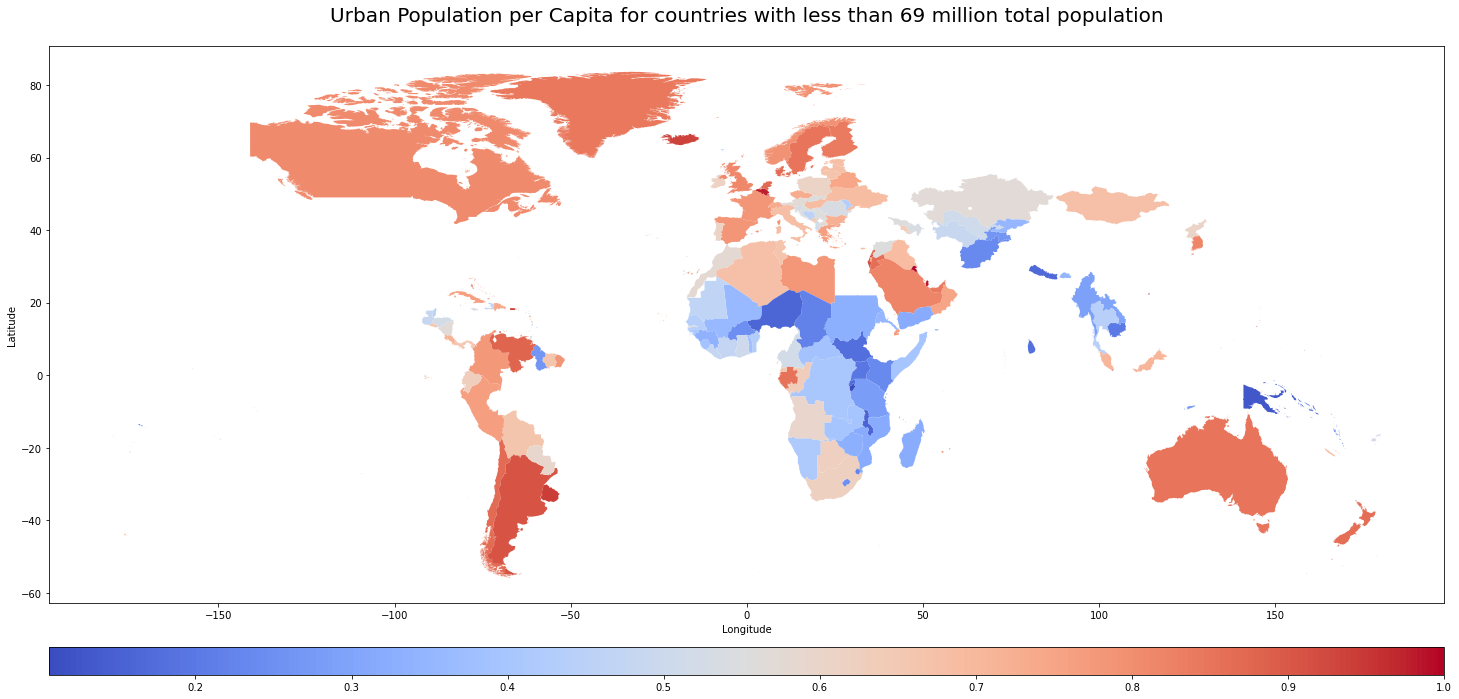

In [106]:
less_69_mil_df = geo_combined_pop[geo_combined_pop.index.isin(less_69_mil)]

from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1, figsize=(25, 16))

ax.set_title("Urban Population per Capita for countries with less than 69 million total population", fontsize=20, pad=25)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

less_69_mil_df.plot(column='2010', 
                      cmap='coolwarm',
                      ax=ax, 
                      legend=True,
                      legend_kwds={'orientation': "horizontal", 
                                   'pad': 0.05, 
                                   'aspect': 50, 
                                   'ticks': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
                                  }
                     );

# for x, y, label in zip(less_69_mil_df.rep_coords.x, less_69_mil_df.rep_coords.y, less_69_mil_df['NAME']):
#     ax.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points", fontsize=10)

# for x, y, val in zip(less_69_mil_df.rep_coords.x, less_69_mil_df.rep_coords.y, less_69_mil_df['2010']):
#     ax.annotate(f'{round(val,2)}', xy=(x, y), xytext=(0, -10), textcoords="offset points")

## 5.6 Mean per capita world urban population from 1990 to 2010

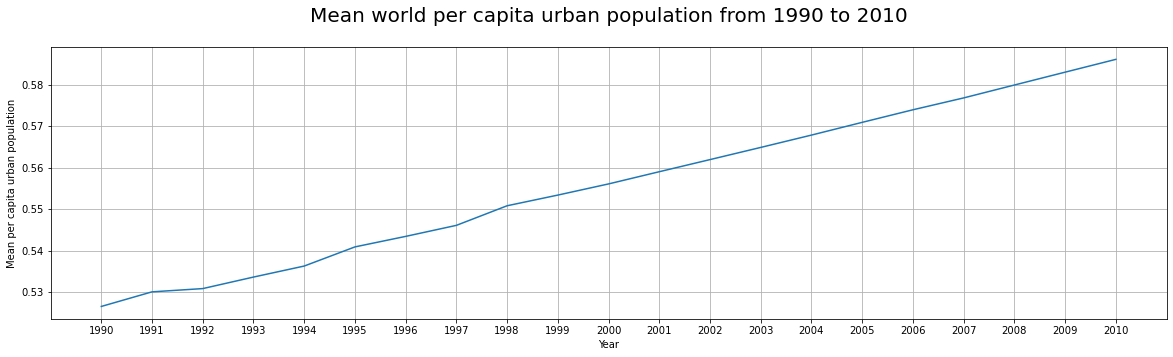

In [107]:
fig, ax = plt.subplots(1, 1, figsize=(20, 5));
ax.set_title("Mean world per capita urban population from 1990 to 2010", fontsize=20, pad=25)
ax.set_xlabel("Year")
ax.set_ylabel("Mean per capita urban population")

sns.lineplot(x=_1990_2010_combined_means.index, y="mean_per_capita_urban_pop", data=_1990_2010_combined_means)
plt.grid()
plt.show()

<div class="alert alert-block alert-info">
        <b> Interpretation </b>
    
At a high level, it can be seen that the mean per capita urban population has increased over the entire timeframe between 1990 to 2010.
    
Starting at 1990, about 53% of the world's population was in urban areas and by 2010, it has increased to about 59%.
    
Using the gridlines, it can be seen that there is roughly a 1% increase approximately every three years.
    
</div>

## 5.7 Correlation plot between mean world population and mean per capita world urban population from 1990 to 2010

In [108]:
correlation_matrix = _1990_2010_combined_means.corr(method='pearson')
correlation_matrix

,mean_per_capita_urban_pop,mean_total_pop
mean_per_capita_urban_pop,1.000000,0.998218
mean_total_pop,0.998218,1.000000


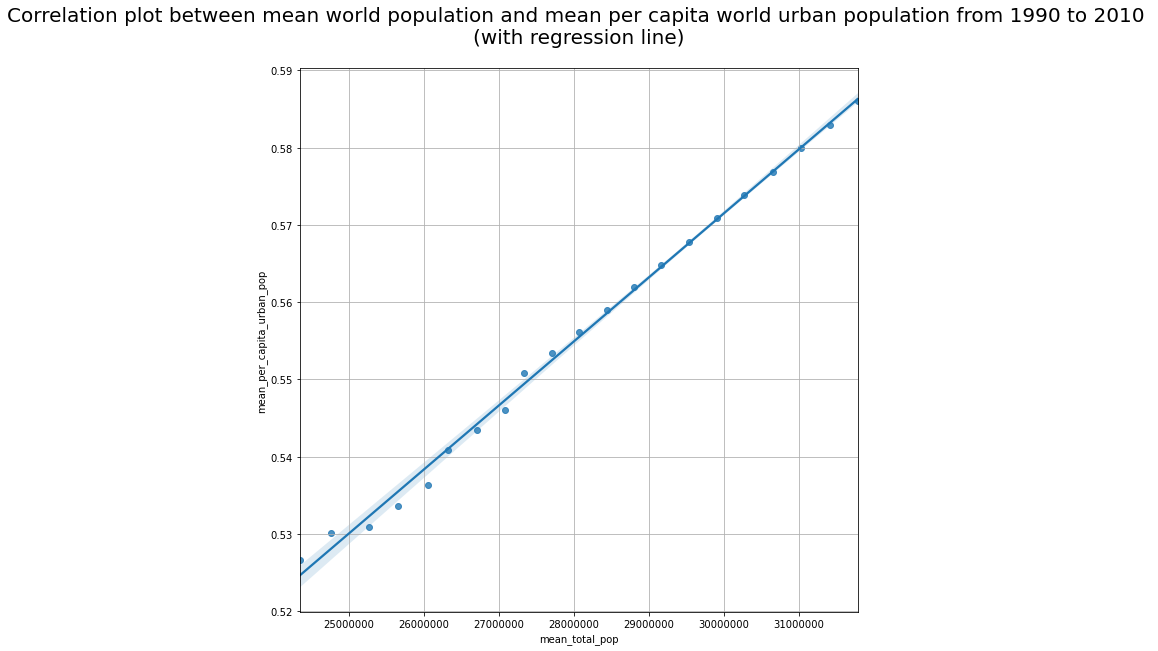

In [109]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10));
ax.set_title("Correlation plot between mean world population and mean per capita world urban population from 1990 to 2010 \n(with regression line)", fontsize=20, pad=25)
ax.set_xlabel("Mean world population")
ax.set_ylabel("Mean per capita urban population")
ax.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax = sns.regplot(x="mean_total_pop", y="mean_per_capita_urban_pop", data=_1990_2010_combined_means)

plt.grid()
plt.show()

<div class="alert alert-block alert-info">
    <b> Interpretation </b>

It can be seen that there is a correlation between mean world population and mean urban population per capita.
    
It is a positive correlation as we can see that mean population per capita has increased with the increase in mean total world population.
    
The interpretation from the plot can also be substantiated by the calculated correlation coefficient which has a value of 0.99 (closer to 1) which indicates a string positive correlation.
    
</div>

# References
- https://geopandas.org/docs/user_guide/mapping.html
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
- https://matplotlib.org/stable/api/colorbar_api.html
- https://geopandas.org/docs/user_guide/mapping.html
- https://stackoverflow.com/questions/53747298/how-to-format-seaborn-matplotlib-axis-tick-labels-from-number-to-thousands-or-mi
- https://www.earthdatascience.org/courses/scientists-guide-to-plotting-data-in-python/plot-with-matplotlib/introduction-to-matplotlib-plots/customize-plot-colors-labels-matplotlib/
- https://medium.com/analytics-vidhya/the-ultimate-markdown-guide-for-jupyter-notebook-d5e5abf728fd
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
- https://stackoverflow.com/questions/38899190/geopandas-label-polygons